## Data Understanding (RightWhaleCalls)

### Membaca File.ts(Dataset)

In [2]:
def read_ts_file(file_path):
    data = []
    labels = []
    is_data_section = False

    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()

            # Mulai membaca setelah @data
            if line.lower() == "@data":
                is_data_section = True
                continue

            if not is_data_section:
                continue

            # Pisahkan nilai dan label
            if ":" in line:
                values, label = line.split(":")
                series = [float(x) for x in values.split(",") if x != ""]
                data.append(series)
                labels.append(label)

    return data, labels


### Load File TRAIN & TEST

In [4]:
train_path = "RightWhaleCalls/RightWhaleCalls_TRAIN.ts"
test_path  = "RightWhaleCalls/RightWhaleCalls_TEST.ts"

X_train, y_train = read_ts_file(train_path)
X_test, y_test = read_ts_file(test_path)

print("File loaded successfully!")


File loaded successfully!


### Informasi Dasar Dataset

In [5]:
print("=== INFORMASI DATASET ===")
print(f"Jumlah data TRAIN : {len(X_train)}")
print(f"Jumlah data TEST  : {len(X_test)}")
print(f"Panjang time series : {len(X_train[0])}")


=== INFORMASI DATASET ===
Jumlah data TRAIN : 8941
Jumlah data TEST  : 1962
Panjang time series : 4000


Suara paus sikat (right whale calls) diambil dari habitat alami mereka di laut menggunakan hidrofon (mikrofon bawah air) yang dipasang di dasar laut atau dibawa oleh pelampung/wahana bawah air, merekam panggilan unik paus untuk komunikasi, navigasi, dan perkawinan, lalu data akustik ini dianalisis untuk memahami populasi, perilaku, dan ancaman seperti tabrakan kapal, memberikan data vital bagi konservasi paus sikat.

**Dari Mana Data Diambil (Sumber Perekaman)**

* Hidrofon Tetap (Fixed Hydrophones): Ditempatkan di dasar laut di area migrasi atau makan paus sikat, merekam suara secara kontinu selama berbulan-bulan atau bertahun-tahun (misalnya, di lepas pantai Amerika Utara).
* Wahana Bergerak (Moored Buoys/Gliders): Pelampung atau glider bawah air yang dilengkapi hidrofon bergerak di area jelajah paus, mengumpulkan data dari berbagai lokasi.
* Tag Akustik (Acoustic Tags): Tag kecil yang dipasang di kulit paus untuk merekam suara mereka secara langsung dari dekat paus, memberikan data perilaku spesifik.
* Hidrofon Kapal (Ship-mounted Hydrophones): Perekaman saat kapal riset berlayar di perairan tempat paus berada, sering kali untuk mendeteksi keberadaan paus secara cepat.

**Bagaimana Cara Mendapatkan Data (Metode Pengambilan & Analisis)**

Pemasangan Hidrofon: Hidrofon diletakkan di area penting (feeding/breeding grounds) menggunakan kapal penelitian, diikat pada jangkar atau mengambang bebas.
1. Perekaman Data: Hidrofon terus-menerus merekam suara bawah air (noise ambient dan panggilan paus) ke dalam unit penyimpanan data.
2. Pengambilan Data: Data diambil secara berkala (bulanan/tahunan) atau dikirimkan secara real-time (untuk sistem yang terhubung satelit).
3. Analisis Spektral: Data suara diubah menjadi spektogram (visualisasi frekuensi vs waktu) untuk mengidentifikasi karakteristik panggilan (nada, durasi).
4. Deteksi Otomatis (Automated Detection): Algoritma komputer digunakan untuk secara otomatis mendeteksi dan mengklasifikasikan panggilan paus (misalnya, "up-calls", "gunshots") dari rekaman yang panjang.
Korelasi dengan Data Lain: Panggilan paus dikorelasikan dengan data visual (pengamatan paus), data pelacakan (GPS), dan data lingkungan (suhu air, aktivitas kapal) untuk memahami konteks perilaku.

### Informasi Kelas

In [ ]:
unique_classes = set(y_train)
print(f"Jumlah kelas unik : {len(unique_classes)}")
print(f"Daftar kelas : {unique_classes}")

Jumlah kelas unik : 2
Daftar kelas : {'1', '0'}


Kasus positif mengandung sekumpulan suara panggilan naik (up-calls) dari paus sikat. Up-calls adalah vokalisasi paus sikat yang paling umum didokumentasikan, dengan karakteristik akustik (tanda tangan suara) berkisar antara 60Hz - 250Hz, dan biasanya berdurasi 1 detik. 

**Makna Label Kelas**

Kedua label numerik ('1' dan '0') mewakili status kasus audio tersebut:

* Kelas '1' (Positif): Label ini mengindikasikan bahwa segmen audio dua detik tersebut mengandung suara panggilan naik (up-call) Paus Sikat. Ini adalah kasus yang ingin dideteksi oleh model.

* Kelas '0' (Negatif/Tidak Ada): Label ini mengindikasikan bahwa segmen audio tidak mengandung suara panggilan Paus Sikat. Kelas ini seringkali berisi kebisingan latar belakang atau suara antropogenik (buatan manusia) lainnya.

### Distribusi Jumlah Data per Kelas

In [7]:
from collections import Counter

print("Distribusi Kelas TRAIN:")
print(Counter(y_train))

print("\nDistribusi Kelas TEST:")
print(Counter(y_test))


Distribusi Kelas TRAIN:
Counter({'1': 5467, '0': 3474})

Distribusi Kelas TEST:
Counter({'1': 981, '0': 981})


1. Distribusi pada Data Latih (Train)
Data yang digunakan untuk melatih model menunjukkan adanya ketidakseimbangan kelas (class imbalance).

* Kelas Positif ('1'): Jumlahnya 5.467 kasus. Kelas ini, yang mewakili segmen audio mengandung suara Paus Sikat (up-calls), merupakan kelas mayoritas.

* Kelas Negatif ('0'): Jumlahnya 3.474 kasus. Kelas ini, yang mewakili segmen audio tidak mengandung suara Paus Sikat, merupakan kelas minoritas.

Secara keseluruhan, sekitar 61% dari data latih adalah kasus positif, sementara sisanya sekitar 39% adalah kasus negatif. Ketidakseimbangan ini perlu diperhatikan karena dapat menyebabkan model menjadi bias (cenderung memprediksi kelas mayoritas) saat proses pelatihan.

2. Distribusi pada Data Uji (Test)
Berbeda dengan data latih, data yang digunakan untuk pengujian menunjukkan keseimbangan kelas yang sempurna (class balance).

* Kelas Positif ('1'): Jumlahnya adalah 981 kasus.

* Kelas Negatif ('0'): Jumlahnya juga 981 kasus.

Ini berarti setiap kelas memiliki persentase yang sama (50%) di dalam data uji. Keseimbangan ini sangat ideal untuk evaluasi, karena metrik kinerja model (seperti akurasi) akan mencerminkan kemampuan model dalam memprediksi kedua kelas secara adil, tanpa dipengaruhi oleh dominasi jumlah sampel.

### Visualisasi 1 Contoh Time Series

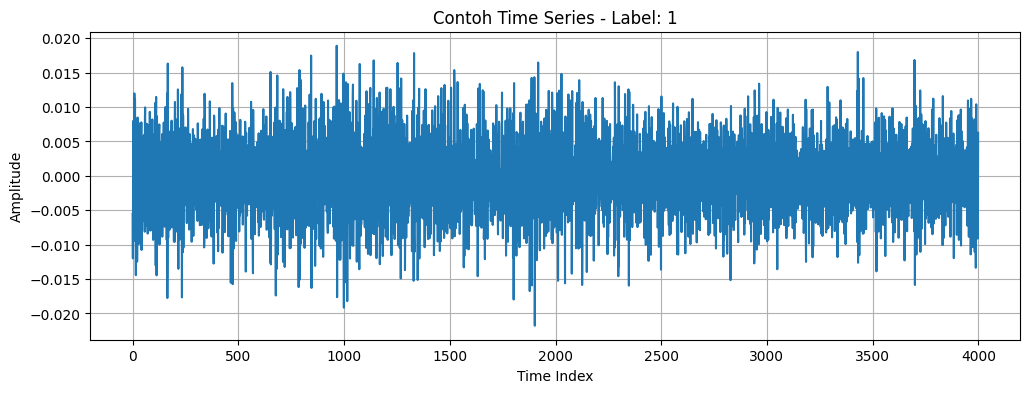

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(X_train[0])
plt.title(f"Contoh Time Series - Label: {y_train[0]}")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
